In [1]:
import pandas as pd
import os
os.listdir()

['.config', 'sample_data']

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Week2/Dataset/student.csv")
df

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62
...,...,...,...
995,72,74,70
996,73,86,90
997,89,87,94
998,83,82,78


In [5]:
df.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [7]:
df.describe()

,Math,Reading,Writing
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


In [8]:
#Adding data into array
X=df[['Math','Reading']].values
Y=df['Writing'].values
Y


array([ 63,  72,  78,  79,  62,  85,  83,  41,  80,  77,  64,  90,  45,
        77,  70,  46,  76,  44,  85,  72,  53,  66,  75,  49,  84,  83,
        68,  66,  77,  78,  74,  83,  72,  65,  46,  66,  50,  79,  68,
        46,  86,  70,  61,  53,  72,  75,  50,  77, 100,  81, 100,  87,
        78,  48,  50,  44,  48,  43,  67,  78,  58,  91,  92,  78,  42,
        85,  73,  83,  61,  58,  60,  55,  48,  62,  68,  59,  62,  48,
        74,  63,  80,  79,  73,  79,  45,  67,  89,  77,  81,  88,  53,
        68,  79,  77,  63,  73,  60,  67, 100,  79,  26,  51,  80,  57,
        41,  78,  68,  49,  76,  41,  71,  77,  89,  86,  55,  80,  56,
        74,  85,  80,  73,  74,  86,  56,  53,  44,  41,  59,  71,  81,
        74,  78,  67,  53,  56,  75,  82,  79,  99,  76,  59,  96,  75,
        61,  56,  88,  65, 100,  79,  55,  61,  83,  74,  59,  54,  47,
        82,  74,  59,  74,  84,  59,  43,  65,  61,  78,  84,  73,  73,
        92,  63,  72,  61,  59,  70,  87,  78,  65,  73,  62,  6

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", Y_train.shape)
print("Testing Target Shape:", Y_test.shape)


Training Features Shape: (800, 2)
Testing Features Shape: (200, 2)
Training Target Shape: (800,)
Testing Target Shape: (200,)


In [10]:
import numpy as np

def cost_function(X, Y, W):
    """
    Calculate the Mean Squared Error (MSE) as the cost function.

    Parameters:
    X: Feature matrix (numpy array of shape [n_samples, n_features])
    Y: Target vector (numpy array of shape [n_samples])
    W: Weight vector (numpy array of shape [n_features])

    Returns:
    cost: Mean Squared Error
    """
    # Number of samples
    n = len(Y)

    # Predicted values (hypothesis) using the weights
    Y_pred = np.dot(X, W)

    # Calculate the squared differences
    errors = (Y_pred - Y) ** 2

    # Calculate the cost (Mean Squared Error)
    cost = np.sum(errors) / (2 * n)

    return cost


In [11]:
# Test data
X_test = np.array([[1, 2], [3, 4], [5, 6]])  # Feature matrix
Y_test = np.array([3, 7, 11])  # Target values
W_test = np.array([1, 1])  # Initial weights

# Calculate the cost
cost = cost_function(X_test, Y_test, W_test)

# Print the cost
print("Cost for the test data:", cost)


Cost for the test data: 0.0


In [12]:
def gradient_descent(X, Y, W, alpha, iterations):
    """
    Perform gradient descent to optimize the weights for linear regression.

    Parameters:
    X (numpy.ndarray): Feature matrix (m x n).
    Y (numpy.ndarray): Target vector (m x 1).
    W (numpy.ndarray): Initial weights (n x 1).
    alpha (float): Learning rate.
    iterations (int): Number of iterations.

    Returns:
    W (numpy.ndarray): Optimized weights.
    cost_history (list): Cost values over iterations.
    """
    # Initialize variables
    m = len(Y)  # Number of samples
    cost_history = []  # To store cost after each iteration

    for i in range(iterations):
        # Step 1: Compute predictions
        Y_pred = np.dot(X, W)

        # Step 2: Calculate the loss (difference between predictions and actual values)
        loss = Y_pred - Y

        # Step 3: Calculate the gradient
        gradient = (1 / m) * np.dot(X.T, loss)

        # Step 4: Update the weights
        W = W - alpha * gradient

        # Step 5: Compute and store the cost
        cost = cost_function(X, Y, W)
        cost_history.append(cost)

        # Optional: Print cost for every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return W, cost_history


In [13]:
# Test data
np.random.seed(0)
X_test = np.random.rand(100, 2)  # 100 samples, 2 features
Y_test = np.random.rand(100)  # 100 target values
W_test = np.zeros(X_test.shape[1])  # Initialize weights as zeros

# Set hyperparameters
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# Run gradient descent
W_optimal, cost_history = gradient_descent(X_test, Y_test, W_test, alpha, iterations)

# Print final weights and first 10 cost values
print("Optimized Weights:", W_optimal)
print("Cost History (First 10):", cost_history[:10])


Iteration 0: Cost = 0.17402553338532806
Iteration 100: Cost = 0.09486460597291767
Iteration 200: Cost = 0.06990081035223944
Iteration 300: Cost = 0.06200850547343853
Iteration 400: Cost = 0.059496668052253794
Iteration 500: Cost = 0.058683248705523064
Iteration 600: Cost = 0.05840818040370676
Iteration 700: Cost = 0.05830562066751888
Iteration 800: Cost = 0.05825990037955376
Iteration 900: Cost = 0.05823419949823281
Optimized Weights: [0.41923541 0.48025925]
Cost History (First 10): [0.17402553338532806, 0.17269846305042716, 0.17138663204182678, 0.17008986528552042, 0.1688079897189329, 0.1675408342678101, 0.1662882298233752, 0.16505000921974683, 0.16382600721161708, 0.1626160604521855]


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(X, Y, W):
    """
    Evaluate the linear regression model using RMSE, MAE, and R^2.

    Parameters:
    X (numpy.ndarray): Feature matrix (m x n).
    Y (numpy.ndarray): Target vector (m x 1).
    W (numpy.ndarray): Optimized weights (n x 1).

    Returns:
    dict: Dictionary containing RMSE, MAE, and R^2 scores.
    """
    # Predicted values
    Y_pred = np.dot(X, W)

    # RMSE
    rmse = np.sqrt(mean_squared_error(Y, Y_pred))

    # MAE
    mae = mean_absolute_error(Y, Y_pred)

    # R^2 Score
    ss_total = np.sum((Y - np.mean(Y)) ** 2)  # Total Sum of Squares
    ss_residual = np.sum((Y - Y_pred) ** 2)   # Residual Sum of Squares
    r2 = 1 - (ss_residual / ss_total)

    return {"RMSE": rmse, "MAE": mae, "R2": r2}

# Example usage
evaluation_results = evaluate_model(X_test, Y_test, W_optimal)
print("Model Evaluation:")
print(f"RMSE: {evaluation_results['RMSE']}")
print(f"MAE: {evaluation_results['MAE']}")
print(f"R^2: {evaluation_results['R2']}")


Model Evaluation:
RMSE: 0.3412235078358408
MAE: 0.276720558592263
R^2: -0.279330215111383


In [15]:
# Evaluate on the training set
train_results = evaluate_model(X_train, Y_train, W_optimal)
print("\nTraining Performance:")
print(f"RMSE: {train_results['RMSE']}")
print(f"MAE: {train_results['MAE']}")
print(f"R^2: {train_results['R2']}")

# Evaluate on the testing set
test_results = evaluate_model(X_test, Y_test, W_optimal)
print("\nTesting Performance:")
print(f"RMSE: {test_results['RMSE']}")
print(f"MAE: {test_results['MAE']}")
print(f"R^2: {test_results['R2']}")



Training Performance:
RMSE: 9.00859730432684
MAE: 7.544211632866641
R^2: 0.6432523531912614

Testing Performance:
RMSE: 0.3412235078358408
MAE: 0.276720558592263
R^2: -0.279330215111383


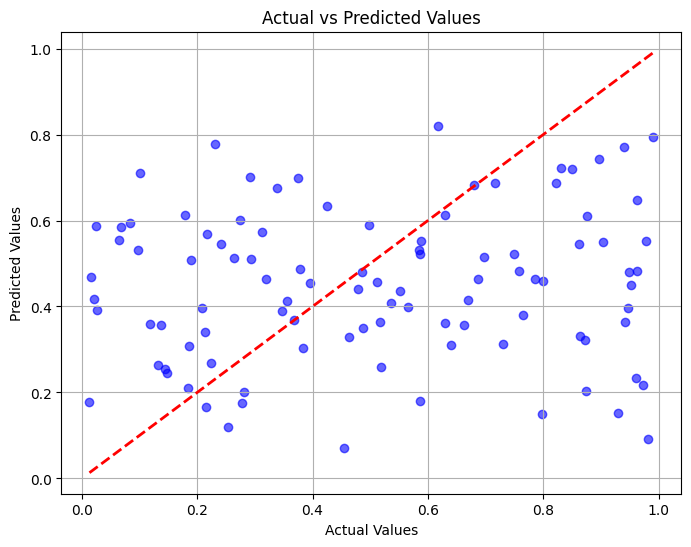

In [16]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(Y_actual, Y_predicted):
    """
    Plot a scatter plot of actual vs predicted values.

    Parameters:
    Y_actual (numpy.ndarray): Actual target values.
    Y_predicted (numpy.ndarray): Predicted target values.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_actual, Y_predicted, color='blue', alpha=0.6)
    plt.plot([Y_actual.min(), Y_actual.max()], [Y_actual.min(), Y_actual.max()], 'r--', lw=2)
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid()
    plt.show()

# Predictions on test set
Y_test_pred = np.dot(X_test, W_optimal)

# Plot
plot_actual_vs_predicted(Y_test, Y_test_pred)


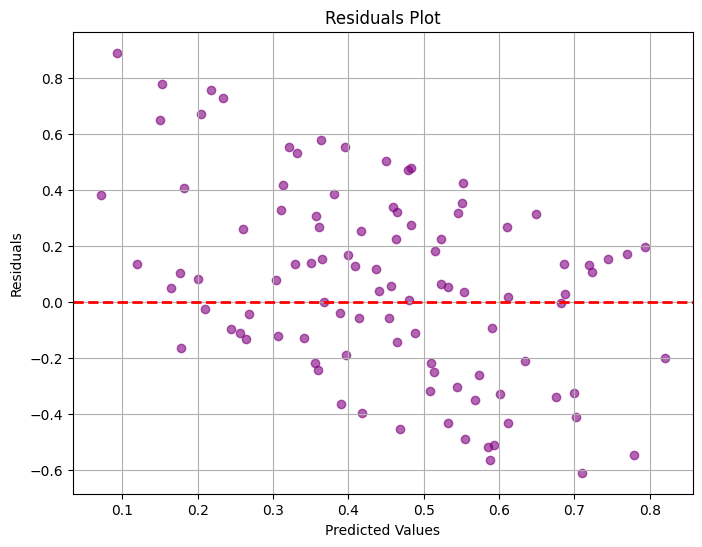

In [17]:
def plot_residuals(Y_actual, Y_predicted):
    """
    Plot a residuals plot (Actual - Predicted).

    Parameters:
    Y_actual (numpy.ndarray): Actual target values.
    Y_predicted (numpy.ndarray): Predicted target values.
    """
    residuals = Y_actual - Y_predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_predicted, residuals, color='purple', alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.title('Residuals Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid()
    plt.show()

# Plot Residuals
plot_residuals(Y_test, Y_test_pred)


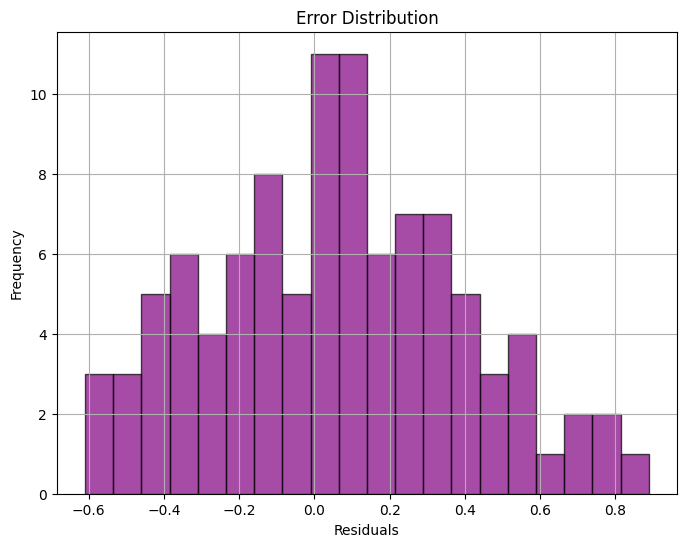

In [19]:
def plot_error_distribution(Y_actual, Y_predicted):
    """
    Plot the distribution of residuals.

    Parameters:
    Y_actual (numpy.ndarray): Actual target values.
    Y_predicted (numpy.ndarray): Predicted target values.
    """
    residuals = Y_actual - Y_predicted
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=20, color='purple', edgecolor='black', alpha=0.7)
    plt.title('Error Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

# Plot Error Distribution
plot_error_distribution(Y_test, Y_test_pred)
